In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display
import seaborn as sns

pd.set_option('display.max_row', 30)
pd.set_option('display.max_columns', 100)

In [2]:
# 데이터 불러오기
df = pd.read_csv('basketball_stat.csv')
df

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


In [3]:
# Position(SG / C)에 따라 True(0), False(1) 결정
df['check'] = np.where(df['Pos'] != 'SG', 0, 1)
df

,Player,Pos,3P,2P,TRB,AST,STL,BLK,check
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1,1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0,0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6,0
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6,0
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5,1
...,...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0,0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7,1
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4,1
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1,0


In [4]:
# Dataset 설정
X=df.drop(['Player','Pos','check'],axis=1).to_numpy()
y=df['check'].to_numpy()

In [5]:
# train_test_split 이용 train set, test set 분할
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4,stratify=y)

In [6]:
# 결정트리 모델 생성
model=DecisionTreeClassifier(max_depth=7,random_state=1).fit(X_train,y_train)

In [7]:
# 모델 정확도 출력
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.9666666666666667


In [8]:
# Graphviz 모듈 이용, 결정트리 시각화
export_graphviz(model,out_file='tree.dot',class_names=['C','SG'],feature_names=df.drop(['Player','Pos','check'],axis=1).columns,filled=True)

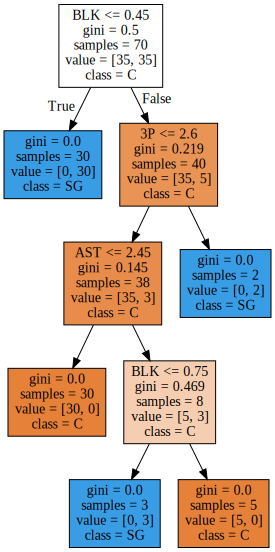

In [9]:
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

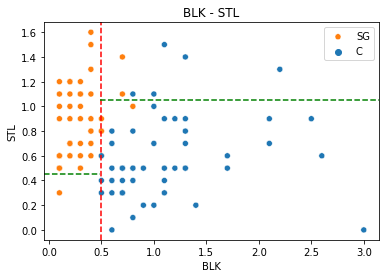

In [10]:
# BLK-STL에 대해 Shooting Guard - Center 영역 시각화
sns.scatterplot(x='BLK', y='STL', data=df, hue="check")
plt.xlabel('BLK')
plt.ylabel('STL')
plt.legend(['SG', 'C'])
plt.axvline(x=0.5, color='r', linestyle='--')
plt.axhline(y=1.05, xmin=0.5/3.0, xmax=3.0, color='g', linestyle='--')
plt.axhline(y=0.45, xmin=0, xmax=0.5/3.0, color='g', linestyle='--')
plt.title('BLK - STL')
plt.show()